<a href="https://colab.research.google.com/github/daniellaeme/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FILE DOWNLOAD

The UCI Heart Disease dataset with **14 columns** and over **300 samples** is used. The dataset is sourced from https://www.kaggle.com/datasets/priyanka841/heart-disease-prediction-uci.

In [1]:
! pip install kaggle

from google.colab import drive
drive.mount('/content/drive')

! mkdir ~/.kaggle

! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d priyanka841/heart-disease-prediction-uci


Mounted at /content/drive
  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 6.05MB/s]


In [2]:
! unzip heart-disease-prediction-uci.zip

Archive:  heart-disease-prediction-uci.zip
  inflating: heart.csv               


## Import the data

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [8]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

# Data Analysis

## Data Cleaning

**Sex** should be categorical

These columns should be categorical
['sex', 'cp', 'fbs', 'restecg', exang', 'slope', 'thal']

## Data Visualisation

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### age

<Axes: >

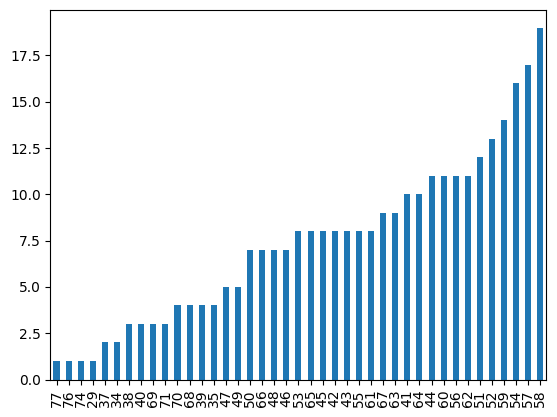

In [10]:
df['age'].value_counts(ascending=True).plot(kind='bar')

Text(0, 0.5, 'Count')

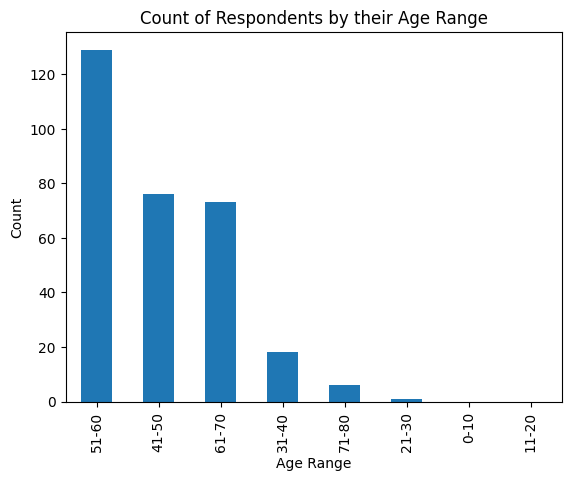

In [11]:
age_ranges = pd.cut(df['age'], [0, 10, 20, 30, 40, 50, 60, 70, 80],
                    labels=['0-10', '11-20', '21-30', '31-40', '41-50',
                            '51-60', '61-70', '71-80'])
df['age_range'] = age_ranges
df['age_range'].value_counts().plot(kind='bar')
plt.title('Count of Respondents by their Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')

- Respondents in the age range **51-60** represent an overwhelming **majority** followed by the age range **41-50** which is followed closely by **61-70**.
- But what is the distribution of diseased respondents?
- **NB**:
target: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing (No heart disease)
        -- Value 1: > 50% diameter narrowing (Presence of heart disease)

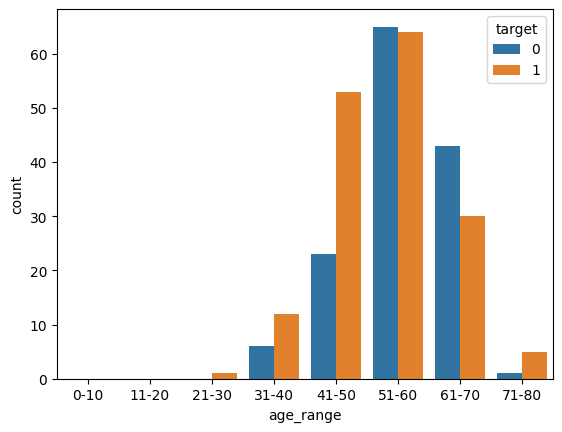

In [12]:
sns.countplot(df, x='age_range', hue='target')
plt.show()

- The presence of heart disease in each range correlates with the amount of respondents in each age range.
- Age range 51-60 has the most diseased respondents with 41-50 coming second and 61-70 following.

### sex

sex (1 = male; 0 = female)

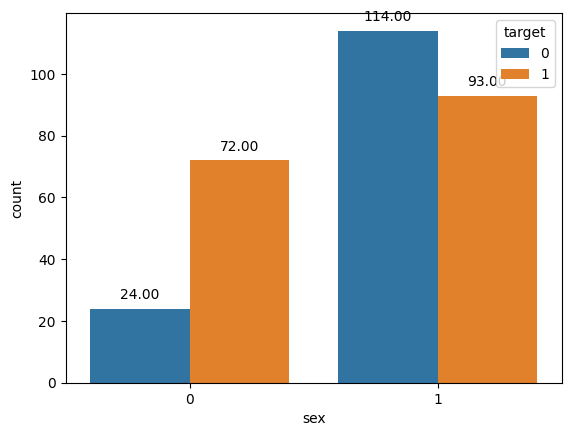

In [13]:
splot = sns.countplot(df, x='sex', hue='target')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'),
  (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 10),
                 textcoords = 'offset points')
plt.show()

- More men who do not have heart disease got tested than women. This is good news because men are more likely to develop heart disease than women and heart disease is a leading cause of death in men [source](https://www.newvictoria.co.uk/about-us/news-and-articles/cardiovascular-risk-in-men-why-is-heart-disease-a-male-problem). Though, more women should be encouraged to get tested for heart disease.

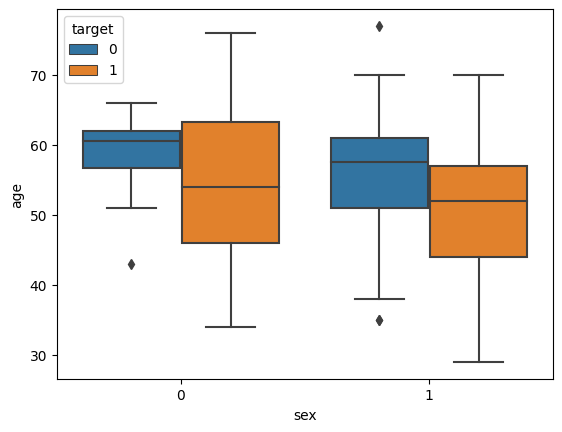

In [14]:
sns.boxplot(df, x='sex', y='age', hue='target')
plt.show()

### cp

<Axes: >

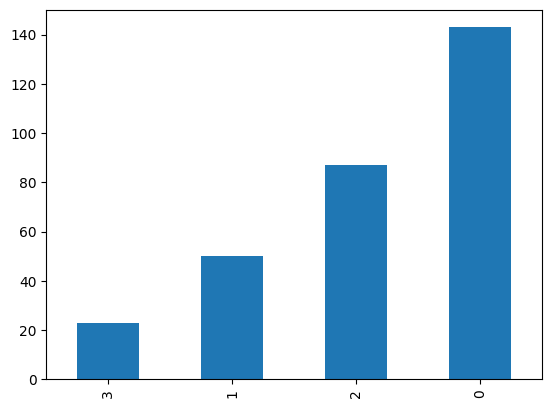

In [15]:
df['cp'].value_counts(ascending=True).plot(kind='bar')

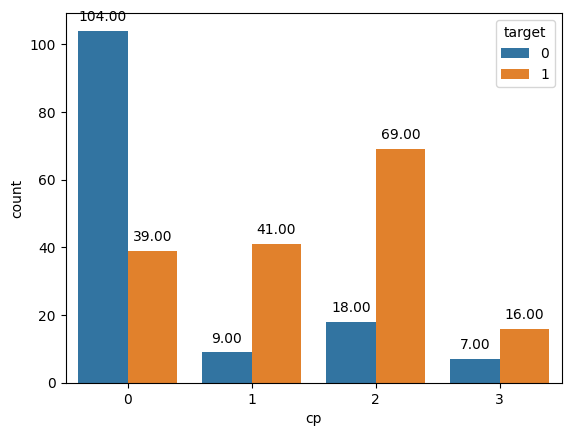

In [16]:
splot = sns.countplot(df, x='cp', hue='target')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'),
  (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 10),
                 textcoords = 'offset points')
plt.show()

### trestbps

resting blood pressure (on admission to the hospital)	in mm Hg

<Axes: >

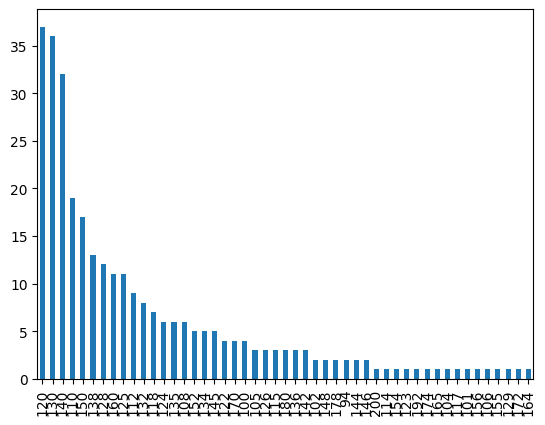

In [17]:
df['trestbps'].value_counts().plot(kind='bar')

In [ ]:
pd.crosstab(df['trestbps'], df['target'])

Arranged according to the highest count of non-diseased patients:
- trestbps	**0**	  1
- 140	      15	17
- 120	      14	23
- 130	      13	23
- 110	      11	8
- 150	      8	  9

Arranged according to the highest count of diseased patients:
- trestbps	0	**1**
- 120	14	23
- 130	13	23
- 140	15	17
- 138	3	10
- 150	8	9

Upon manual inspection, it seems that the likelihood of a patient being diagnosed with a heart disease is not significantly determined by the trestbps value.
- As noted, 150, 140, 130 and 120 are the most common trestbps values for both patients diagnosed with and without heart disease.

## Correlation

In [24]:
df.corr()['target'].abs().sort_values(ascending=False)

<ipython-input-24-17089f14c8b1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['target'].abs().sort_values(ascending=False)


target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

<ipython-input-20-7c1f99d72a22>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="winter")


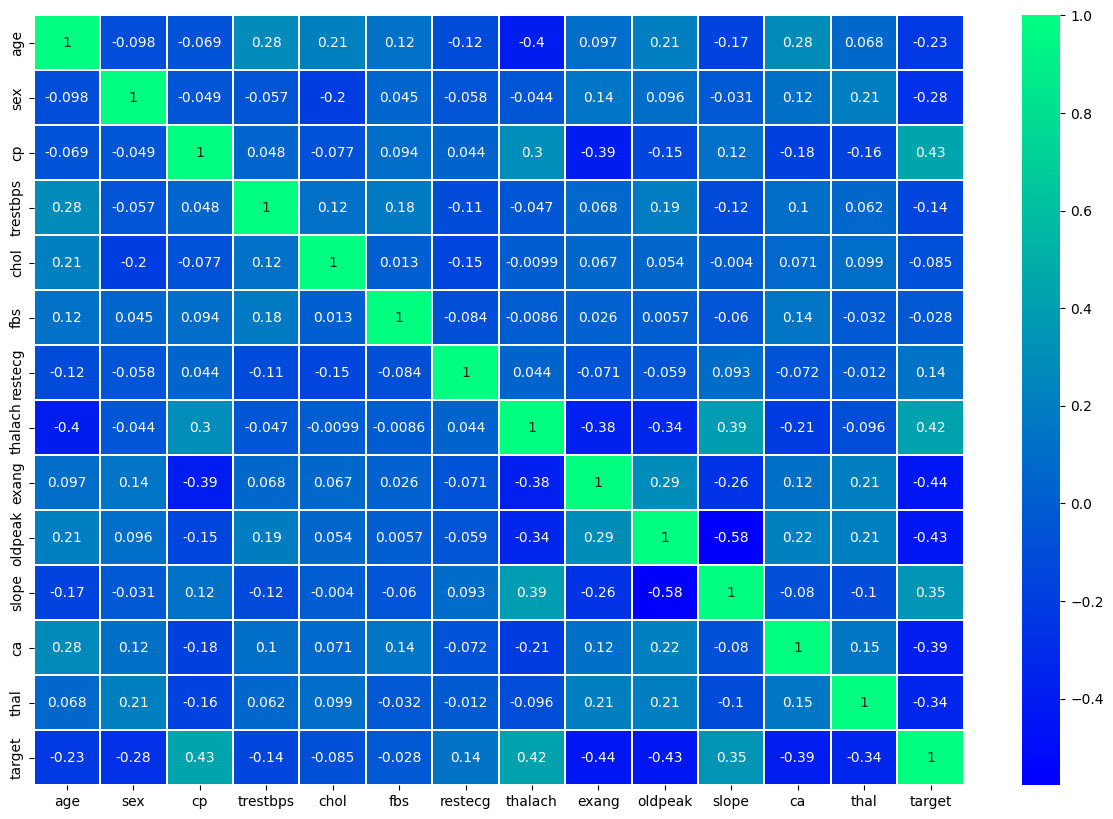

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

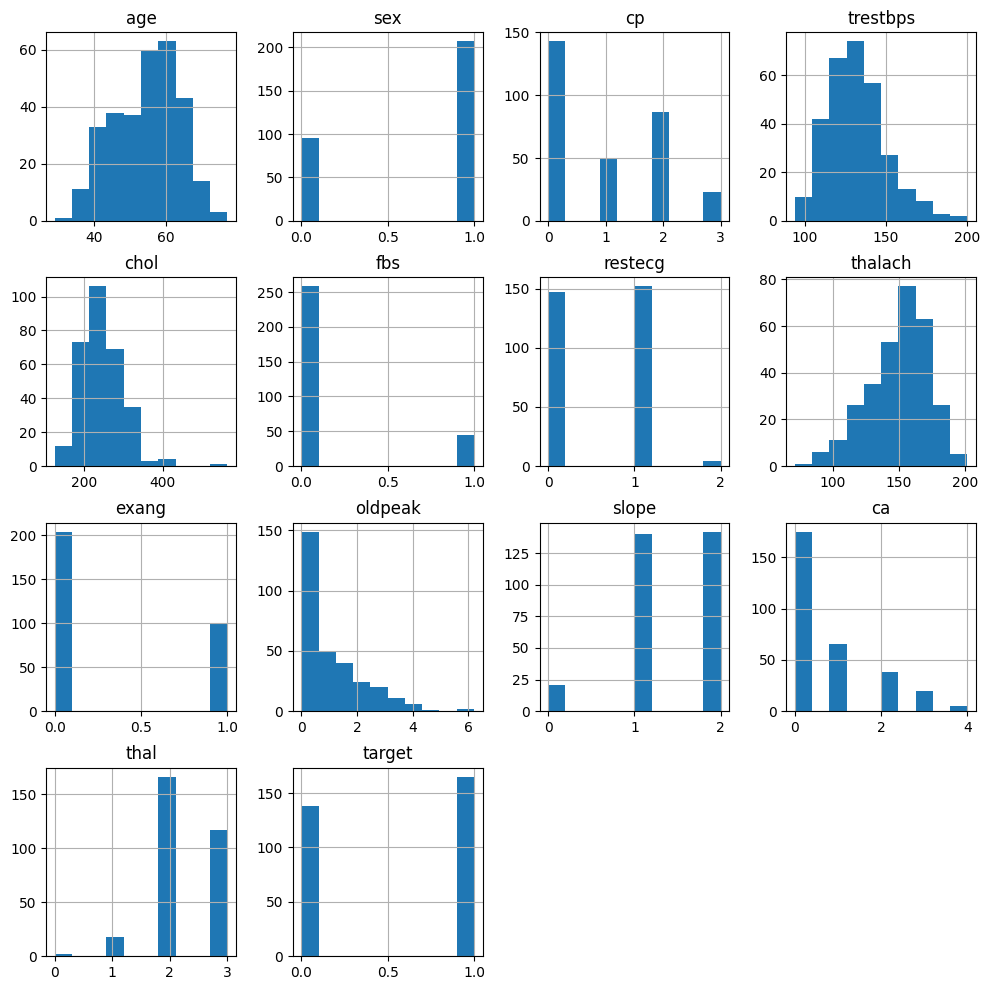

In [21]:
df.hist(figsize=(12,12))
plt.savefig('featuresplot')

# Model Building

In [27]:
X = df.drop(['target', 'age_range'], axis=1)
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=1)

## Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing Accuracy for Logistic Regression: 0.8461538461538461
Testing Sensitivity for Logistic Regression: 0.8461538461538461
Testing Specificity for Logistic Regression: 0.8461538461538461
Testing Precision for Logistic Regression: 0.8048780487804879


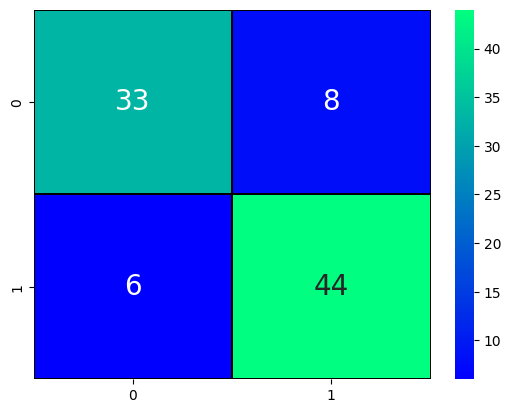

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr_base = LogisticRegression(random_state=0)
lr_base.fit(X_train, y_train)
lr_base_preds = lr_base.predict(X_test)

cm1=confusion_matrix(y_test, lr_base_preds)

sns.heatmap(cm1, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

Testing Accuracy for Logistic Regression: 0.8351648351648352
Testing Sensitivity for Logistic Regression: 0.7954545454545454
Testing Specificity for Logistic Regression: 0.8723404255319149
Testing Precision for Logistic Regression: 0.8536585365853658


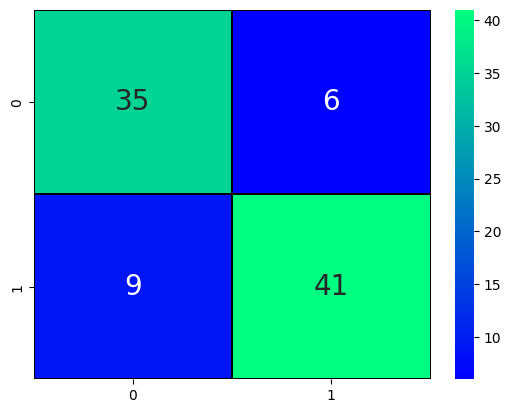

In [37]:
lr2 = LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=700, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
lr2.fit(X_train, y_train)
lr2_preds = lr2.predict(X_test)

cm2 = confusion_matrix(y_test, lr2_preds)

sns.heatmap(cm2, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm2[0][0]
TN=cm2[1][1]
FN=cm2[1][0]
FP=cm2[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr2_preds))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.87      0.82      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



# Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.96      0.94      0.95        50

    accuracy                           0.95        91
   macro avg       0.94      0.95      0.94        91
weighted avg       0.95      0.95      0.95        91

Testing Accuracy for Decision Tree: 0.945054945054945
Testing Sensitivity for Decision Tree: 0.9285714285714286
Testing Specificity for Decision Tree: 0.9591836734693877
Testing Precision for Decision Tree: 0.9512195121951219


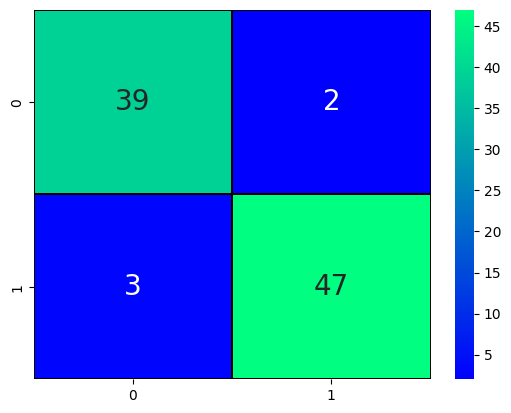

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

In [41]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.96      0.94      0.95        50

    accuracy                           0.95        91
   macro avg       0.94      0.95      0.94        91
weighted avg       0.95      0.95      0.95        91



# Prediction
- using 94.5% dtc

In [65]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [60]:
def heart_disease_predict(tuple):
  input_as_numpy=np.asarray(tuple)
  np_input=input_as_numpy.reshape(1,-1)
  val_pred = tree_model.predict(np_input)
  if(val_pred==1):
    print("The patient seems to have heart disease")
  else:
    print("The patient seems to be Normal")

In [63]:
heart_disease_predict((63,0, 3,145,233, 1, 0, 150, 0 ,2.3, 1, 1, 0))

The patient seems to have heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
